Importing various mendatory libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
airbnb_df=pd.read_csv('/content/Airbnb Dataset 19.csv')

first we have to check the shape of data set

In [7]:
airbnb_df.shape

(249, 16)

In [8]:
airbnb_df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,07-05-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [9]:
airbnb_df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [10]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              249 non-null    int64  
 1   name                            249 non-null    object 
 2   host_id                         249 non-null    int64  
 3   host_name                       249 non-null    object 
 4   neighbourhood_group             249 non-null    object 
 5   neighbourhood                   249 non-null    object 
 6   latitude                        249 non-null    float64
 7   longitude                       249 non-null    float64
 8   room_type                       249 non-null    object 
 9   price                           249 non-null    int64  
 10  minimum_nights                  249 non-null    int64  
 11  number_of_reviews               249 non-null    int64  
 12  last_review                     242 

To check the availability of null values in each column

In [11]:
airbnb_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       7
reviews_per_month                 7
calculated_host_listings_count    0
availability_365                  0
dtype: int64

drop unrequired columns

In [12]:
airbnb_df.drop(['id','name','last_review'], axis=1, inplace=True)

after droping the null value look into changes

In [13]:
airbnb_df.head(5)

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


replace the (reviews per month) with zero

In [14]:
airbnb_df.fillna({'reviews_per_month': 0},inplace = True)

check the modifications

In [15]:
airbnb_df.reviews_per_month.isnull().sum()

0

finally checking the NAN values

In [16]:
airbnb_df.isnull()
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         249 non-null    int64  
 1   host_name                       249 non-null    object 
 2   neighbourhood_group             249 non-null    object 
 3   neighbourhood                   249 non-null    object 
 4   latitude                        249 non-null    float64
 5   longitude                       249 non-null    float64
 6   room_type                       249 non-null    object 
 7   price                           249 non-null    int64  
 8   minimum_nights                  249 non-null    int64  
 9   number_of_reviews               249 non-null    int64  
 10  reviews_per_month               249 non-null    float64
 11  calculated_host_listings_count  249 non-null    int64  
 12  availability_365                249 

converting dtype of room_type

analysing continuous variables

In [17]:
airbnb_df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.490000e+02,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,1.499884e+05,40.730257,-73.964044,143.971888,8.718876,103.445783,1.060964,1.738956,198.538153
std,4.010393e+05,0.049660,0.029685,91.442975,20.398680,100.337887,1.002393,1.234635,126.048056
min,2.787000e+03,40.631880,-74.080880,35.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,5.014800e+04,40.688430,-73.984980,85.000000,2.000000,21.000000,0.260000,1.000000,75.000000
50%,9.779700e+04,40.721620,-73.964280,125.000000,3.000000,73.000000,0.770000,1.000000,225.000000
75%,1.936370e+05,40.761930,-73.948220,175.000000,5.000000,166.000000,1.650000,2.000000,310.000000
max,6.197784e+06,40.867540,-73.765970,800.000000,200.000000,467.000000,4.720000,6.000000,365.000000


looking various columns name

In [18]:
airbnb_df.columns

Index(['host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

now,finding the relation between all variables

Index(['host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

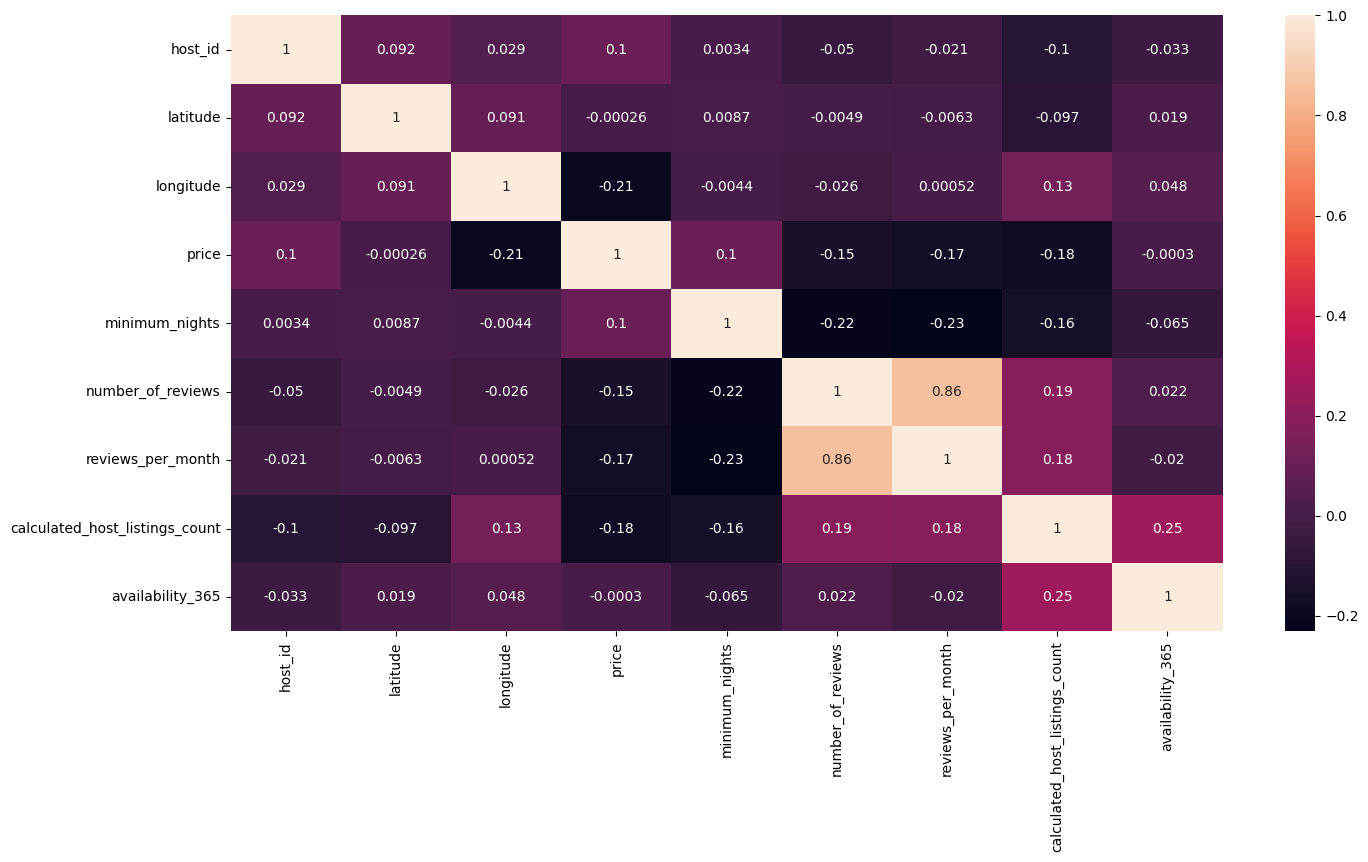

In [19]:
corr= airbnb_df.corr(method = 'kendall')
plt.figure(figsize = (16,8))
sns.heatmap(corr , annot=True)
airbnb_df.columns

now finding the shape of dataframe

In [20]:
airbnb_df.shape

(249, 13)

Now analysis of unique values

In [22]:
airbnb_df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [23]:
len(airbnb_df.neighbourhood_group.unique())

5

analysis of room type is mendatory for later analysis

In [24]:
airbnb_df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

Visualization of data

In [25]:
top_host=airbnb_df.host_id.value_counts().head(5)
top_host


204539    5
126607    3
256161    3
32294     3
9744      3
Name: host_id, dtype: int64

In [26]:
top_host_check=airbnb_df.calculated_host_listings_count.max()

top_host_check

6

setting figure size for further visualization

In [27]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

In [28]:
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_host_df

,Host_ID,P_Count
0,204539,5
1,126607,3
2,256161,3
3,32294,3
4,9744,3


[Text(0, 0, '9744'),
 Text(1, 0, '32294'),
 Text(2, 0, '126607'),
 Text(3, 0, '204539'),
 Text(4, 0, '256161')]

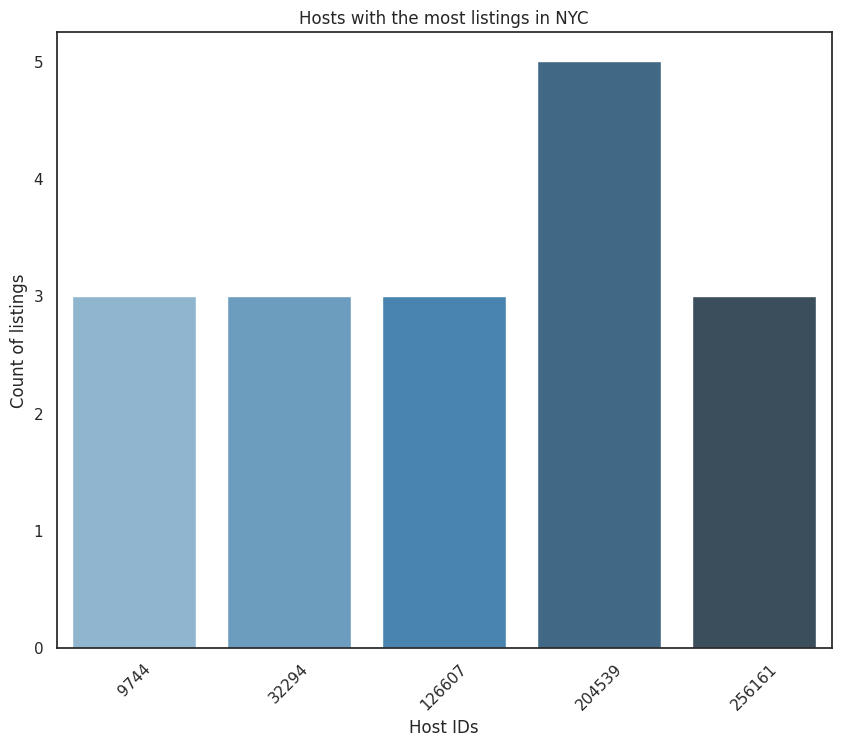

In [29]:

visualization_1=sns.barplot(x="Host_ID", y="P_Count", data=top_host_df,
                 palette='Blues_d')
visualization_1.set_title('Hosts with the most listings in NYC')
visualization_1.set_ylabel('Count of listings')
visualization_1.set_xlabel('Host IDs')
visualization_1.set_xticklabels(visualization_1.get_xticklabels(), rotation=45)

#Interesting, we can see that there is a good distribution between top 5 hosts with the most listings. Second host has more than 5+ listings.

finding out top 10 neighbourhoods

In [30]:
airbnb_df.neighbourhood.value_counts().head(10)

Williamsburg          26
Harlem                22
East Village          20
Bedford-Stuyvesant    17
Hell's Kitchen        12
Clinton Hill           9
Upper West Side        9
Fort Greene            8
West Village           8
Lower East Side        8
Name: neighbourhood, dtype: int64

combine this with our boroughs and room type for a rich visualization we can make

In [31]:
sub_1=airbnb_df.loc[airbnb_df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]

using catplot to represent multiple interesting attributes together and a count

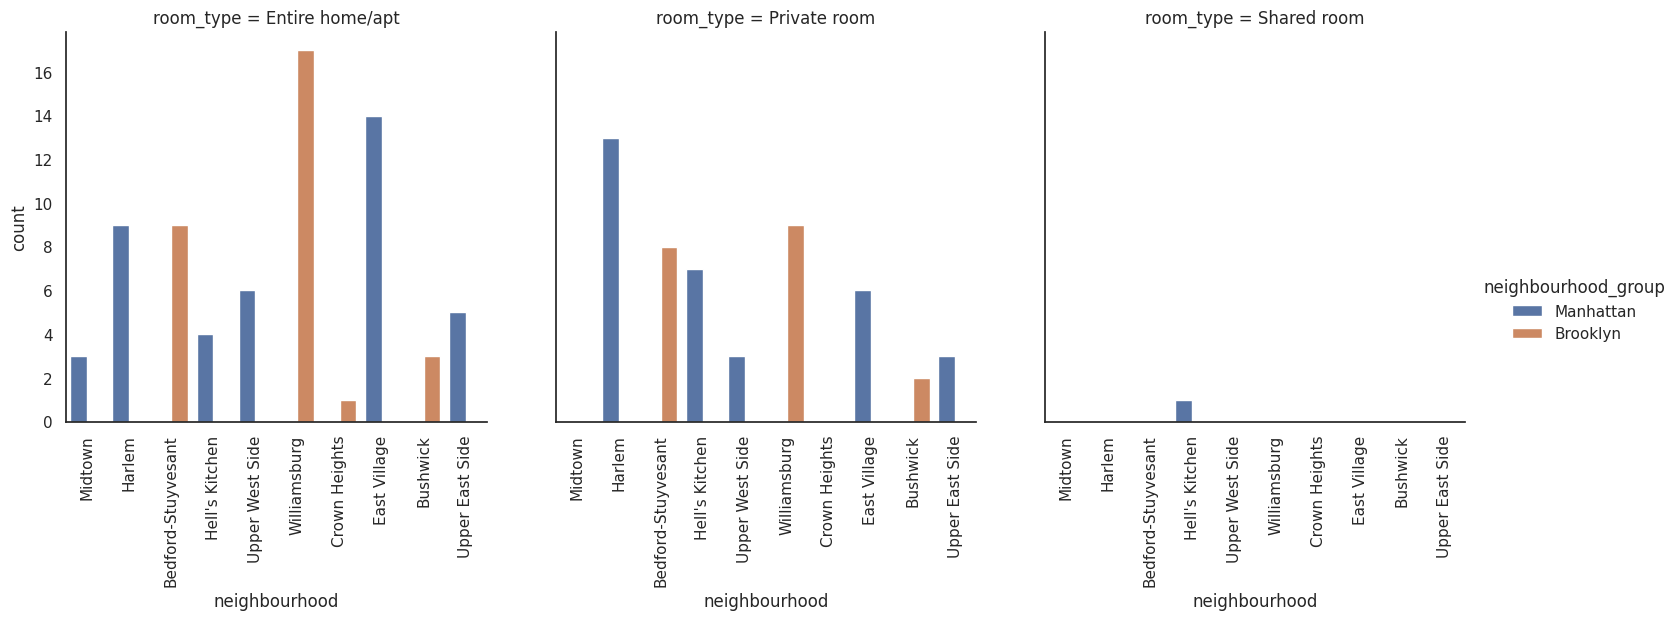

In [ ]:
visualization_2=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_1, kind='count')
visualization_2.set_xticklabels(rotation=90)

we can see that our plot consists of 3 subplots - that is the power of using catplot; with such output, we can easily proceed with comparing distributions among interesting attributes. Y and X axes stay exactly the same for each subplot, Y-axis represents a count of observations and X-axis observations we want to count. However, there are 2 more important elements: column and hue; those 2 differentiate subplots.we can see that for these 10 neighborhoods only 2 boroughs are represented: Manhattan and Brooklyn; that was somewhat expected as Manhattan and Brooklyn are one of the most traveled destinations, therefore would have the most listing availability. We can also observe that Bedford-Stuyvesant and Williamsburg are the most popular for Manhattan borough, and Harlem for Brooklyn.

#we can do with our given longtitude and latitude columns.
#Now can see how scatterplot will come out

creating a sub-dataframe with no extreme values / less than 500

In [32]:
sub_2=airbnb_df[airbnb_df.price < 500]


we analyse the effect of longtitude and latitude columns


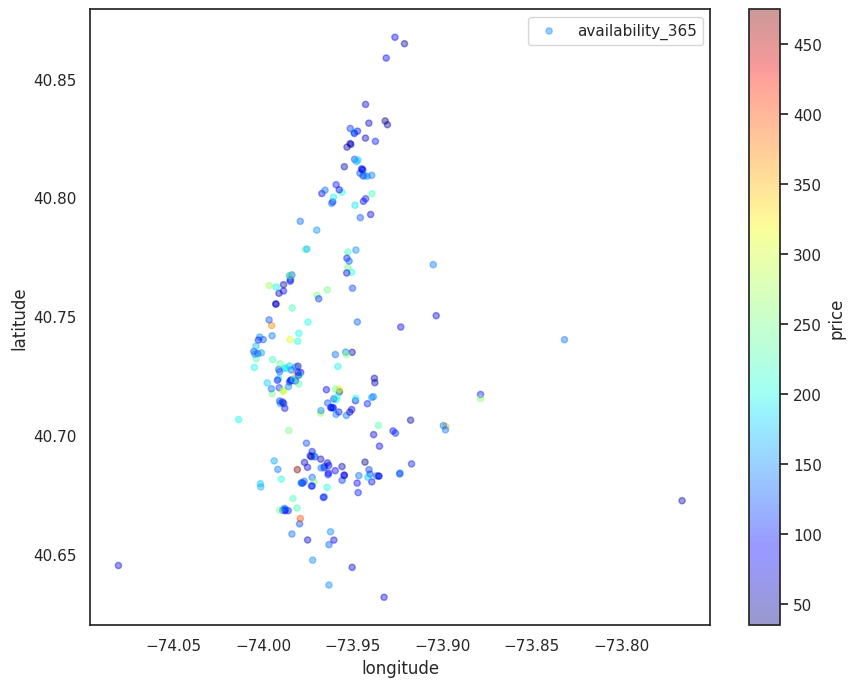

In [33]:
visualization_3=sub_2.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
visualization_3.legend()

Relation between neighbourgroup and Availability of Room

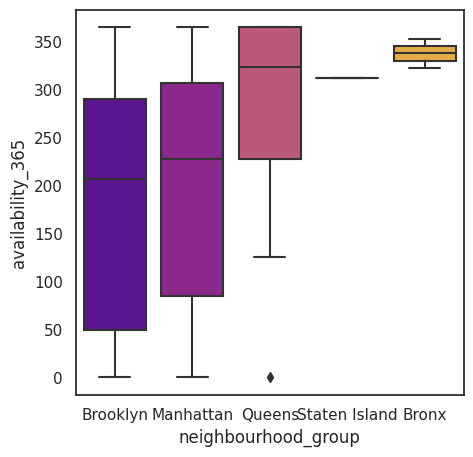

In [34]:
plt.figure(figsize=(5,5))
ax = sns.boxplot(data=airbnb_df, x='neighbourhood_group',y='availability_365',palette='plasma')

### **HR DATASET**

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta


importing dataframe

In [36]:
hr_df=pd.read_csv('/content/HRDataset_v14.csv')

In [39]:
hr_df.head(5)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,Adinolfi Wilson K,10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,Ait Sidi Karthikeyan,10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,Akinkuolie Sarah,10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,AlagbeTrina,10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,01-03-2019,0,15
4,Anderson Carol,10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,02-01-2016,0,2


In [40]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

This function displays the boolean values in a column format. False means no values are duplicated

In [41]:
hr_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
306    False
307    False
308    False
309    False
310    False
Length: 311, dtype: bool

Finding missing elements in a DataFrame

In [42]:
hr_df.isnull()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
307,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
308,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
309,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Dropping columns

In [43]:
hr_df.drop(['EmpID','MarriedID','MaritalStatusID','ManagerName','ManagerID'], axis = 1, inplace=True)

In [44]:
hr_df.head(5)

,Employee_Name,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,...,EmploymentStatus,Department,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,Adinolfi Wilson K,1,1,5,4,0,62506,0,19,Production Technician I,...,Active,Production,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,Ait Sidi Karthikeyan,1,5,3,3,0,104437,1,27,Sr. DBA,...,Voluntarily Terminated,IT/IS,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,Akinkuolie Sarah,0,5,5,3,0,64955,1,20,Production Technician II,...,Voluntarily Terminated,Production,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,AlagbeTrina,0,1,5,3,0,64991,0,19,Production Technician I,...,Active,Production,Indeed,Fully Meets,4.84,5,0,01-03-2019,0,15
4,Anderson Carol,0,5,5,3,0,50825,1,19,Production Technician I,...,Voluntarily Terminated,Production,Google Search,Fully Meets,5.00,4,0,02-01-2016,0,2


In [45]:
hr_df.columns

Index(['Employee_Name', 'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID',
       'FromDiversityJobFairID', 'Salary', 'Termd', 'PositionID', 'Position',
       'State', 'Zip', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc',
       'HispanicLatino', 'RaceDesc', 'DateofHire', 'DateofTermination',
       'TermReason', 'EmploymentStatus', 'Department', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [46]:
hr_df.Position

0       Production Technician I
1                       Sr. DBA
2      Production Technician II
3       Production Technician I
4       Production Technician I
                 ...           
306    Production Technician II
307     Production Technician I
308                         CIO
309                Data Analyst
310     Production Technician I
Name: Position, Length: 311, dtype: object

In [47]:
hr_df.Position.unique()

array(['Production Technician I', 'Sr. DBA', 'Production Technician II',
       'Software Engineer', 'IT Support', 'Data Analyst',
       'Database Administrator', 'Enterprise Architect', 'Sr. Accountant',
       'Production Manager', 'Accountant I', 'Area Sales Manager',
       'Software Engineering Manager', 'BI Director',
       'Director of Operations', 'Sr. Network Engineer', 'Sales Manager',
       'BI Developer', 'IT Manager - Support', 'Network Engineer',
       'IT Director', 'Director of Sales', 'Administrative Assistant',
       'President & CEO', 'Senior BI Developer',
       'Shared Services Manager', 'IT Manager - Infra',
       'Principal Data Architect', 'Data Architect', 'IT Manager - DB',
       'Data Analyst ', 'CIO'], dtype=object)

Different Job Positions.


In [48]:
positions = hr_df.Position.unique()
positions.sort()
positions

array(['Accountant I', 'Administrative Assistant', 'Area Sales Manager',
       'BI Developer', 'BI Director', 'CIO', 'Data Analyst',
       'Data Analyst ', 'Data Architect', 'Database Administrator',
       'Director of Operations', 'Director of Sales',
       'Enterprise Architect', 'IT Director', 'IT Manager - DB',
       'IT Manager - Infra', 'IT Manager - Support', 'IT Support',
       'Network Engineer', 'President & CEO', 'Principal Data Architect',
       'Production Manager', 'Production Technician I',
       'Production Technician II', 'Sales Manager', 'Senior BI Developer',
       'Shared Services Manager', 'Software Engineer',
       'Software Engineering Manager', 'Sr. Accountant', 'Sr. DBA',
       'Sr. Network Engineer'], dtype=object)

In [51]:
department = hr_df.Department.unique()
department

array(['Production       ', 'IT/IS', 'Software Engineering',
       'Admin Offices', 'Sales', 'Executive Office'], dtype=object)

In [52]:
hr_df.Position.replace("Data Analyst ", "Data Analyst",inplace=True)
positions = hr_df.Position.unique()
positions.sort()
positions

array(['Accountant I', 'Administrative Assistant', 'Area Sales Manager',
       'BI Developer', 'BI Director', 'CIO', 'Data Analyst',
       'Data Architect', 'Database Administrator',
       'Director of Operations', 'Director of Sales',
       'Enterprise Architect', 'IT Director', 'IT Manager - DB',
       'IT Manager - Infra', 'IT Manager - Support', 'IT Support',
       'Network Engineer', 'President & CEO', 'Principal Data Architect',
       'Production Manager', 'Production Technician I',
       'Production Technician II', 'Sales Manager', 'Senior BI Developer',
       'Shared Services Manager', 'Software Engineer',
       'Software Engineering Manager', 'Sr. Accountant', 'Sr. DBA',
       'Sr. Network Engineer'], dtype=object)

Let's have a look at number of employees in each Department.

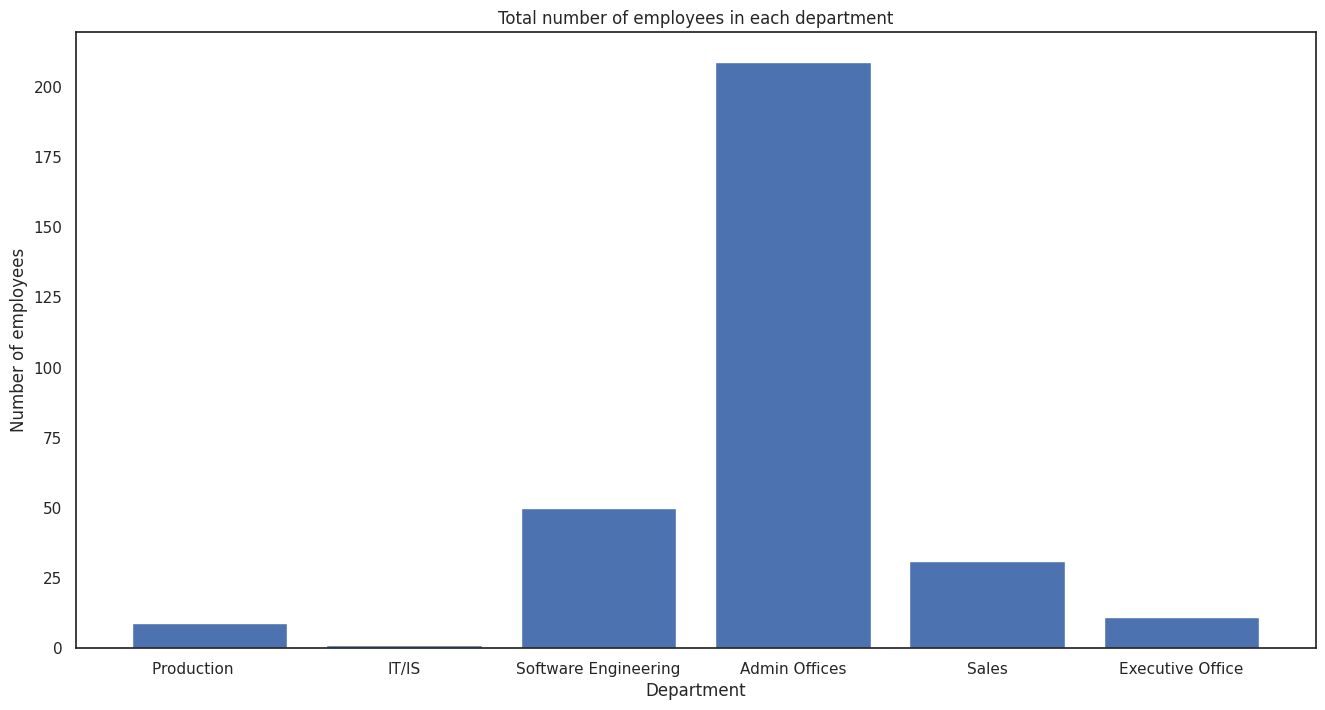

In [53]:
employees_count = hr_df.groupby('Department').Employee_Name.count()
plt.figure(figsize=(16,8))
plt.bar(department, employees_count)
plt.ylabel('Number of employees')
plt.xlabel('Department')
plt.title('Total number of employees in each department');

Different recruitment sources

In [54]:
recruitment = hr_df.RecruitmentSource.unique()
recruitment

array(['LinkedIn', 'Indeed', 'Google Search', 'Employee Referral',
       'Diversity Job Fair', 'On-line Web application', 'CareerBuilder',
       'Website', 'Other'], dtype=object)

Total Employees recruited through each sources. 

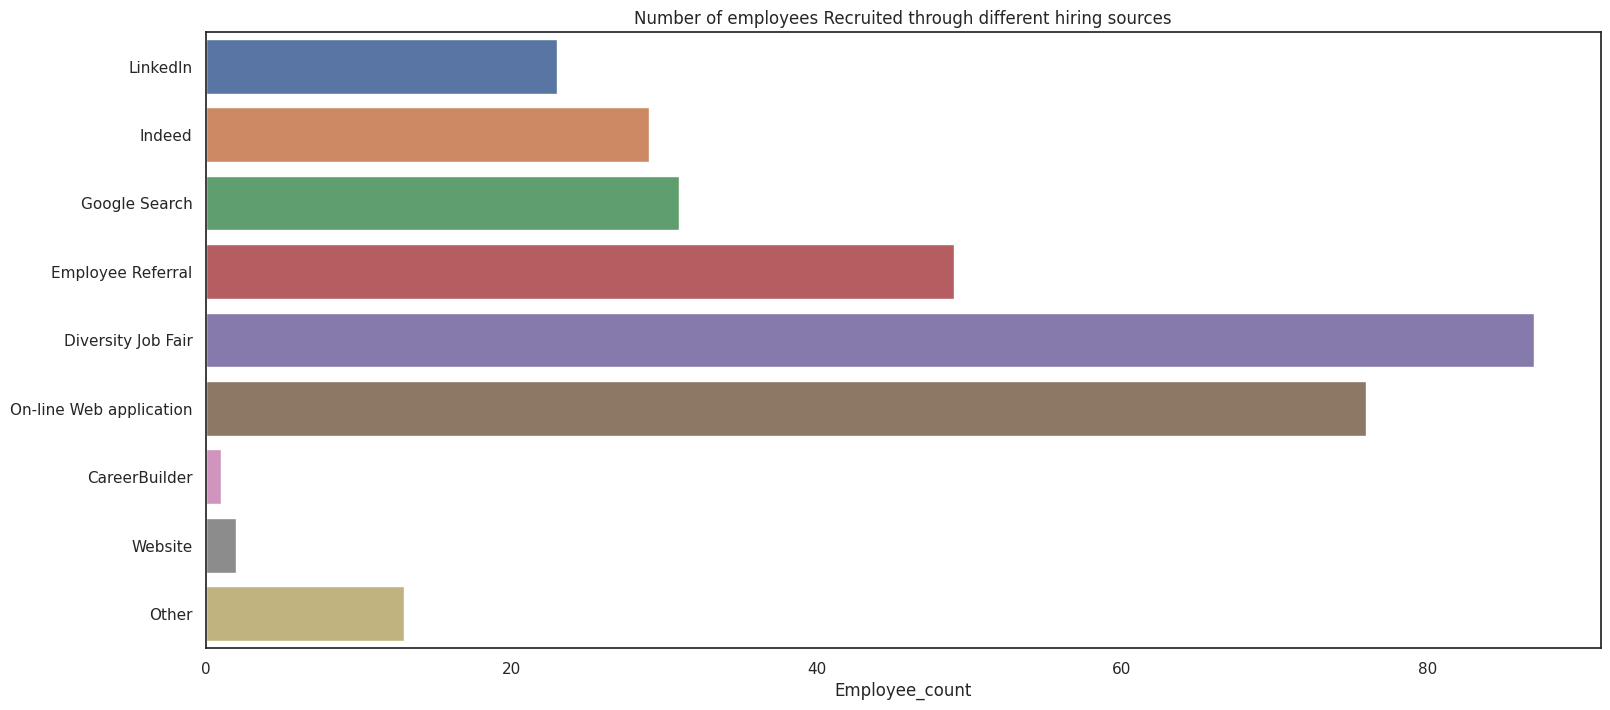

In [55]:
employees_count = hr_df.groupby('RecruitmentSource').Employee_Name.count()
plt.figure(figsize=(18,8))
sns.barplot(x=employees_count,y=recruitment)
plt.xlabel('Employee_count')
plt.title('Number of employees Recruited through different hiring sources');

**Above Graph shows number of employees recruited through different hiring sources.**

average Salary of employee in each Deaprtment

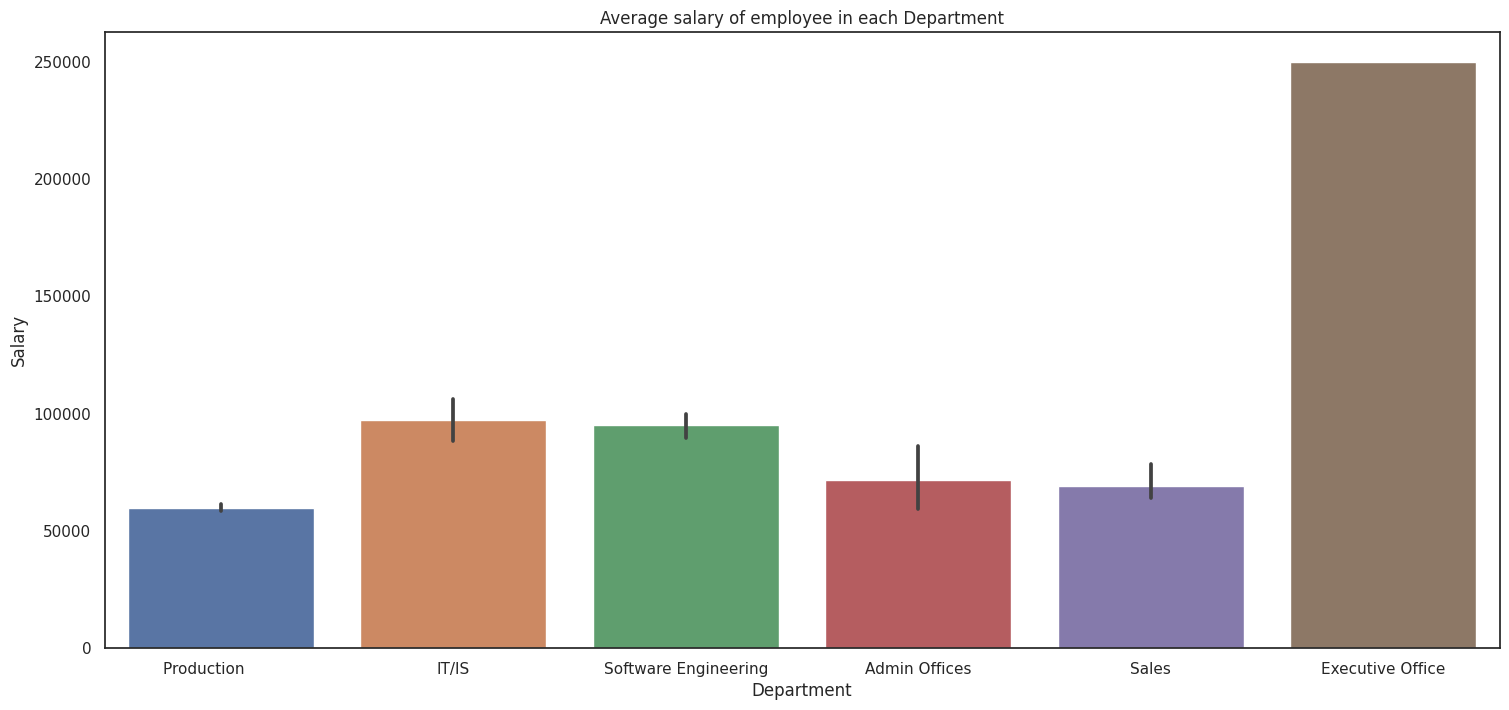

In [56]:
plt.figure(figsize=(18,8))
sns.barplot(x='Department', y='Salary', data=hr_df)
plt.title('Average salary of employee in each Department');

employee performs well according to martial status

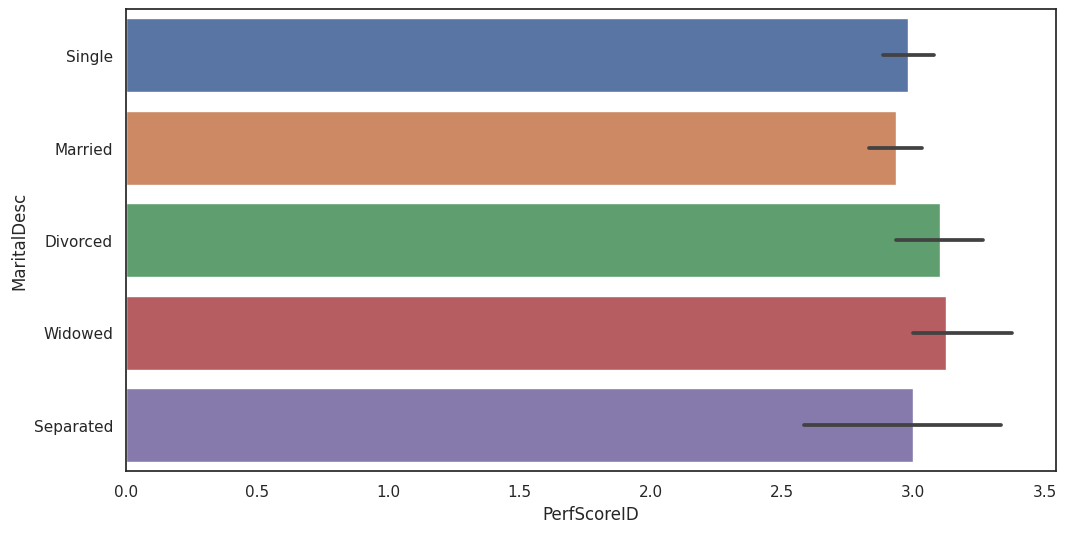

In [59]:
plt.figure(figsize=(12,6))
sns.barplot(x=hr_df.PerfScoreID,y=hr_df.MaritalDesc, data=hr_df);


**Here we can see irrespective of Marital Status overall performance of employees is more or less the same.**

highest Employee Satisfaction according to various department

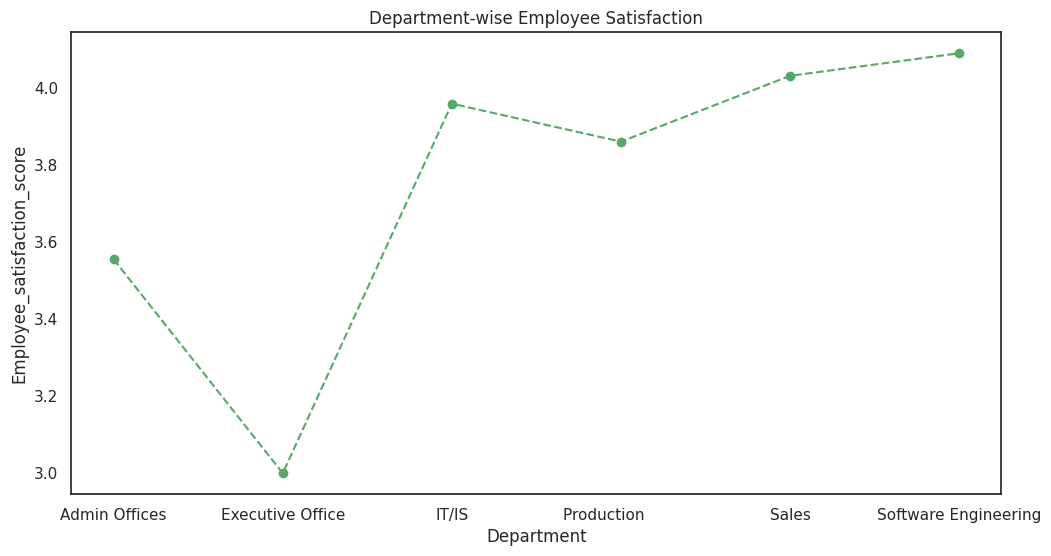

In [60]:
emp_satis = hr_df.groupby('Department').EmpSatisfaction.mean()
plt.figure(figsize=(12,6))
plt.plot(emp_satis, 'o--g')
plt.ylabel('Employee_satisfaction_score')
plt.xlabel('Department')
plt.title('Department-wise Employee Satisfaction');

**Executive Office Department has the lowest Employee Satisfaction and above we have seen average salary distribution in each department where Executive Office had the highest average Salary**

Are Female employees getting paid same as the Male employees

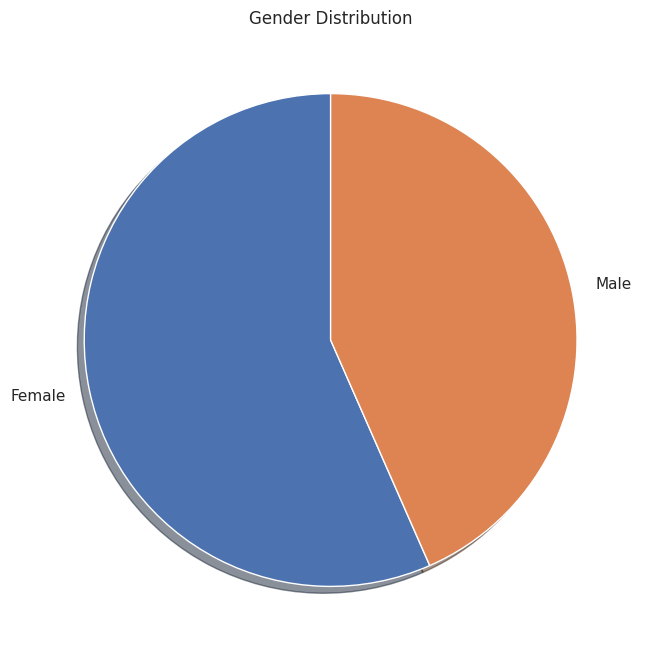

In [62]:
hr_df.groupby('Sex').Employee_Name.count()
gender = ["Female", "Male"]
plt.pie(hr_df.groupby('Sex').Employee_Name.count(), labels = gender, startangle = 90, shadow = True)
plt.title('Gender Distribution');

**Female employees are more than male employees.**